In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
def get_letters_in_file(file_path):
    with open(file_path) as f:
            doc = f.read()

    replace_chars = ['\n', '\t']
    for r_char in replace_chars:
        doc = doc.replace(r_char, '')
    letters_dict = Counter(doc)
    letters_dict['label'] = l
    
    return letters_dict

In [3]:
folder = 'languageID/'
languages = ['e', 'j', 's']
l_documents = []
for l in languages:
    for i in range(10):
        file = l + str(i) +'.txt'
        letters_dict = get_letters_in_file(folder + file)
        
        l_documents.append(letters_dict)

In [4]:
df = pd.DataFrame(l_documents)

In [5]:
df.shape
X = df.drop(['label'], axis=1)
y = df['label']

In [6]:
alpha = 1/2
Kl = 3 
prior = (y.value_counts() + alpha) / (y.shape[0] + Kl*alpha)

print('PRIOR:\n' + str(prior))

PRIOR:
j    0.333333
e    0.333333
s    0.333333
Name: label, dtype: float64


In [7]:
sortby = list(map(chr, range(97, 123))) + [' ']

In [8]:
Ks = 27 
tot_l_in_label = df.groupby('label').sum().sum(axis=1)
l_in_label = df.groupby('label').sum().T
conditional_proba = (l_in_label + alpha) / (tot_l_in_label + Ks*alpha)

conditional_proba.loc[sortby]

label,e,j,s
a,0.060169,0.131766,0.104560
b,0.011135,0.010867,0.008233
c,0.021510,0.005486,0.037526
d,0.021973,0.017226,0.039746
e,0.105369,0.060205,0.113811
f,0.018933,0.003879,0.008603
g,0.017479,0.014012,0.007184
h,0.047216,0.031762,0.004533
i,0.055411,0.097033,0.049860
j,0.001421,0.002341,0.006629


In [9]:
conditional_proba.loc[sortby, 'e'].to_csv('images/conditional_proba_e.csv')

In [10]:
conditional_proba.loc[sortby, ['j', 's']].to_csv('images/conditional_proba_j_s.csv')

In [11]:
# (conditional_proba*prior).sort_index()

In [12]:
label = 'e'
i = 10
test_dict = get_letters_in_file(folder+label+str(i)+'.txt')
x_test = pd.Series(test_dict, name=label+str(i)+'_bow', index=sortby)
# x_test = df_test.drop('label')

x_test.loc[sortby].to_csv('images/bag_words_e10.csv')

x_test = x_test/x_test.sum()

x_test.loc[sortby].to_csv('images/freq_words_e10.csv')

In [13]:
pd.Series(test_dict, name=label+str(i)+'_bow', index=sortby).sum()

2775

In [14]:
res = []
for l in languages:
    proba = (x_test * np.log(conditional_proba[l])).sum()
    res.append([l, proba, np.exp(proba)])
df_e10_res = pd.DataFrame(res, columns=['language', 'conditionalLogProba', 'conditional']).set_index('language')
df_e10_res['conditionalLogProba'].to_csv('images/conditional_e10.csv')
df_e10_res['conditionalLogProba']

language
e   -2.825897
j   -3.160877
s   -3.051273
Name: conditionalLogProba, dtype: float64

In [15]:
posterior = df_e10_res['conditionalLogProba']+np.log(prior)
posterior.rename('posteriorLogProba').to_csv('images/posterior_e10.csv')
posterior

e   -3.924510
j   -4.259489
s   -4.149885
dtype: float64

In [16]:
results = []

for label in languages:
    for i in range(10, 20):
        test_dict = get_letters_in_file(folder+label+str(i)+'.txt')
        x_test = pd.Series(test_dict, name=label+str(i)+'_bow', index=sortby)
#         x_test = df_test.drop('label')
        x_test = x_test/x_test.sum()

        res = []
        for l in languages:
            # TODO add prior
            proba = (x_test * np.log(conditional_proba[l])).sum()
            res.append([l, proba, prior[l]*np.exp(proba)])
        results.append([label] + max(res, key=lambda x:x[1]))
#         results.append(max(res, key=lambda x:x[1]))

In [17]:
res_df = pd.DataFrame(results, columns=['label', 'pred', 'cond_log_proba', 'proba'])

In [18]:
# res_df

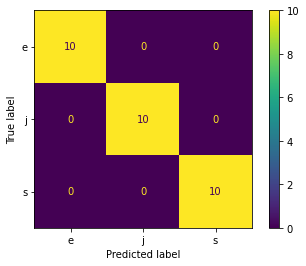

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(res_df['label'], res_df['pred'], labels=languages ) # TODO check if labels are assigned correctly
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=languages) # TODO check if labels are assigned correctly

disp.plot();

In [20]:
label = 'j'
i = 14
test_dict = get_letters_in_file(folder+label+str(i)+'.txt')
df_test = pd.Series(test_dict, name='test')
x_test = df_test.drop('label')
# x_test = x_test/x_test.sum()


In [21]:
label = 's'
i = 14
file_path = folder+label+str(i)+'.txt'

with open(file_path) as f:
            doc = f.read()

replace_chars = ['\n', '\t']
for r_char in replace_chars:
    doc = doc.replace(r_char, '')

In [22]:
doc

'aunque los mexicanos empezaron a dominar a tener posesion del balon a ganar los rebotes y a presionar a los de casa desde la salida no pudieron tener claridad en las jugadas porque se defendieron bien los hondurenosun minuto despues carlos vela se olvido completamente del balon y le dio tremenda patada por atras a ramon nunez para recibir la roja del arbitro guatemalteco carlos batres quedarse dormido en el trabajowwwenplenitudcomsi eres de las que no se conforma con nada y tu afan por lucir siempre impecable te lleva de cabeza no debes desviar tu atencion de una parte muy escondida de tu belleza que sin embargo puede llegar a sugerirlo todo de ti hablamos de tus pestanasy no olvides al aplicar el rimel que el exceso de producto en el cepillo puede emborronar la mirada dejar grumos o convertir tus pestanas en un bloque rigido sin ningun atractivo un simple panuelo de papel puede servirte para retirar esos excesos del cepilloseguro que tu esteticien podra aconsejarte y limpiar la zona 

In [23]:
random = list(doc)
np.random.shuffle(random)
random = ''.join(random)

In [24]:
random

'lesvo  insip oorrts mepe srirtlceaidslouo r f geeasrrdudei nmousiaaeouaedapo etlsudwid uuus ld sb trecai o vaypei oli ocenpea  etoaalntdendt  rlr  ae mpsnm m   ivrrao nmis  ase iopap iaberber essdaote aey tavaac eedtdssmqnbgemrund e  lreq uemontimd  oloeeereuln sgsdnnuecetdsb  ts ssetrrcdhx e da rf umsrlr ildmmoeecqcopran goraoecrd m ie  pz losaraaeovc iadsltneaaona u uoa hoetatbred tepoereodtueoh fsdr woeo  eeo upmmbbcuwao utao as  eerctrsnaea elirec dcive laaa unp ei o  d din ana iorraiilbiclvfeaiiant et e   ndepaigc innsl ccb uairvlir bennpucu edcayiaclanreee  tln aamtet dniusoq mirsupa eaaatle lam suoc edtapemhalar u olnt  agtme ein lnsa nrlzlep nczi tdpieoald  msog tadl nentdteee rdece aila ir  reuapacaeaodsan llstadns im o xj  rte ra aoecino y pismlerz ias du eedaer naaeens oqpl ara orend lnlri s  l eljtlosar ueec  rvenj aaromees l e rttcisaa rgtopn esbooiil enyslodrl osc s l oemuseambrralne ia lr oa p bare je o  pdei eundaaai euafyt  ezoi ppa aad lepaat iojein btsro ihlc eejcle

In [25]:
letters_dict = Counter(random)

In [26]:
random_df = pd.Series(letters_dict)

In [27]:
# random_df = random_df/random_df.sum()

res = []
for l in languages:
    proba = (random_df * np.log(conditional_proba[l])).sum()
    res.append([l, proba])

In [28]:
res

[['e', -5135.988884507473],
 ['j', -5698.726857943492],
 ['s', -4918.813749148354]]

In [29]:
max(res, key=lambda x:x[1])

['s', -4918.813749148354]